In [1]:
from pandas import read_csv

In [2]:
df=read_csv('international-airline-passengers.csv',usecols=[1])
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [3]:
values=df.values.astype('float32')
values.shape

(144, 1)

In [4]:
train_size=int(values.shape[0]*0.70)
test_size=values.shape[0]-train_size

train=values[0:train_size]
train.shape

test=values[train_size:]
test.shape

(44, 1)

# Scaling before creating dataset
    

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)
train


array([[0.02588999],
       [0.04530746],
       [0.09061491],
       [0.08090615],
       [0.05501619],
       [0.10032365],
       [0.14239484],
       [0.14239484],
       [0.10355988],
       [0.04854369],
       [0.        ],
       [0.04530746],
       [0.03559873],
       [0.07119742],
       [0.11974111],
       [0.10032365],
       [0.06796119],
       [0.14563107],
       [0.21359226],
       [0.21359226],
       [0.17475727],
       [0.09385115],
       [0.03236246],
       [0.11650488],
       [0.13268611],
       [0.14886734],
       [0.2394822 ],
       [0.1909385 ],
       [0.22006473],
       [0.2394822 ],
       [0.3074434 ],
       [0.3074434 ],
       [0.25889972],
       [0.18770227],
       [0.13592234],
       [0.20064726],
       [0.2168285 ],
       [0.24595472],
       [0.2880259 ],
       [0.24919096],
       [0.25566342],
       [0.36893204],
       [0.40776703],
       [0.44660196],
       [0.33980587],
       [0.28155342],
       [0.22006473],
       [0.291

In [7]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        dataX.append(x)
        y=data[i+k,0]
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [8]:
lookback=12
import numpy as np

In [9]:
trainx,trainy=create_dataset(train,lookback)
testx,testy=create_dataset(test,lookback)
testy

array([0.8381878 , 1.0711975 , 1.2524272 , 1.2977347 , 0.97087383,
       0.82524276, 0.66666675, 0.75404537, 0.82847905, 0.7702266 ,
       0.9773463 , 0.94498384, 1.0226538 , 1.1909386 , 1.4368933 ,
       1.472492  , 1.1618124 , 0.9805826 , 0.8349515 , 0.9741101 ,
       1.012945  , 0.9288026 , 1.0194175 , 1.1553398 , 1.1909386 ,
       1.3948221 , 1.6763754 , 1.6245955 , 1.3074435 , 1.1553398 ,
       0.92556643, 1.0614887 ], dtype=float32)

In [10]:
trainx=np.reshape(trainx,(trainx.shape[0],trainx.shape[1],1))
testx=np.reshape(testx,(testx.shape[0],testx.shape[1],1))
testx

array([[[0.8122978 ],
        [1.0291263 ],
        [1.1682849 ],
        [1.1747574 ],
        [0.97087383],
        [0.7864078 ],
        [0.6504855 ],
        [0.7508091 ],
        [0.7637541 ],
        [0.69255674],
        [0.8349515 ],
        [0.7896441 ]],

       [[1.0291263 ],
        [1.1682849 ],
        [1.1747574 ],
        [0.97087383],
        [0.7864078 ],
        [0.6504855 ],
        [0.7508091 ],
        [0.7637541 ],
        [0.69255674],
        [0.8349515 ],
        [0.7896441 ],
        [0.8381878 ]],

       [[1.1682849 ],
        [1.1747574 ],
        [0.97087383],
        [0.7864078 ],
        [0.6504855 ],
        [0.7508091 ],
        [0.7637541 ],
        [0.69255674],
        [0.8349515 ],
        [0.7896441 ],
        [0.8381878 ],
        [1.0711975 ]],

       [[1.1747574 ],
        [0.97087383],
        [0.7864078 ],
        [0.6504855 ],
        [0.7508091 ],
        [0.7637541 ],
        [0.69255674],
        [0.8349515 ],
        [0.7896441 ],
    

# Applying RNN of single layer with 4 nodes

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

model=Sequential()

model.add(SimpleRNN(4,input_shape=(lookback,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(trainx,trainy,epochs=10,batch_size=1)



E:\study\PYTHON\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/10
88/88 [==============================] - 3s 35ms/step - loss: 0.0455
Epoch 2/10
88/88 [==============================] - 0s 3ms/step - loss: 0.0367
Epoch 3/10
88/88 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 4/10
88/88 [==============================] - 0s 3ms/step - loss: 0.0275
Epoch 5/10
88/88 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 6/10
88/88 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 7/10
88/88 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 8/10
88/88 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 9/10
88/88 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 10/10
88/88 [==============================] - 0s 3ms/step - loss: 0.0157


In [19]:
testPredict=model.predict(testx)
testPredict=scaler.inverse_transform(testPredict).ravel()
testPredict

trainPredict=model.predict(trainx)
print(trainPredict.shape)
trainPredict=scaler.inverse_transform(trainPredict).ravel()
trainPredict
print(trainy.shape)
testTrue=scaler.inverse_transform([testy]).ravel()
trainTrue=scaler.inverse_transform([trainy]).ravel()
trainTrue.shape

(88, 1)
(88,)


(88,)

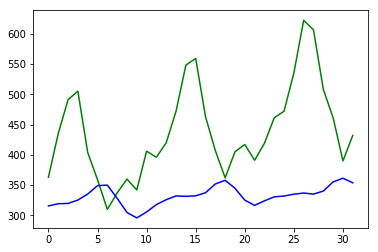

In [22]:
import matplotlib.pyplot as plt
plt.plot(testTrue,'g')
plt.plot(testPredict,'b')
plt.show()